# Evaluation of Cross Lingual

In this section, we aim to gain deeper understanding of the generalizability of emotion expression in the four different languages we used for our analysis. Thereby, we replicate the experiment from the study by Latif et al. and add comparisons between the three languages from central Europe while adding further models and analyses. 

First, we import the result data from our crosslingual analysis (see cross_lingual_prediction.ipynb).
Second, we plot the performance differences between the six different models (SVM (linear and rbf), log. Regression, Random Forest, XGBoost, Dummy) we used for training for each setting individually.
Third, we plot the performances of our cross-lingual comparison using XGBoost (best performing model) with Balanced Accuracy (same metric used in the main paper). Here, we compare our result to the baseline accuracy of each language to see whether the results correspond to general performance of the model on that language. 

By analyzing cross-lingual emotion recognition, we hope to find whether emotion expressions in speech are to some extend similar across different cultural and lingual backgrounds. That would be the case if we found that emotion detection score is increased when a model trained on one of the languages is tested on another language when compared to a dummy. Furthermore, we hope to gain insight as to what extend there are more similarities between Middle-European languages when cross-lingually trained and tested on each other than with the Central-Asian Urdu language.

In [1]:
# dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# data

# testing with urdu
train_english_test_urdu = pd.read_csv('train_english_test_urdu.csv')
train_german_test_urdu = pd.read_csv('train_german_test_urdu.csv')
train_italian_test_urdu = pd.read_csv('train_italian_test_urdu.csv')

# training with urdu
train_urdu_test_english = pd.read_csv('train_urdu_test_english.csv')
train_urdu_test_german = pd.read_csv('train_urdu_test_german.csv')
train_urdu_test_italian = pd.read_csv('train_urdu_test_italian.csv')

# baselines
baseline_english = pd.read_csv(r'..\Baseline\english_results.csv') 
baseline_german = pd.read_csv(r'..\Baseline\german_results.csv')
baseline_italian = pd.read_csv(r'..\Baseline\italian_results.csv')
baseline_urdu = pd.read_csv(r'..\Baseline\urdu_results.csv')

In [3]:
# Melt the DataFrame to long format for easier plotting
train_english_test_urdu = train_english_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_german_test_urdu = train_german_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_italian_test_urdu = train_italian_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")

train_urdu_test_english = train_urdu_test_english.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_urdu_test_german = train_urdu_test_german.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_urdu_test_italian = train_urdu_test_italian.melt(id_vars="Model", var_name="Metric", value_name="Score")

In [4]:
# combine dataframes
dfs = [baseline_german, baseline_english, baseline_italian, baseline_urdu]
names = ['German', 'English', 'Italian', 'Urdu']
combined_df_baseline = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(dfs, names)],
        ignore_index=True
    )

# combine dataframes
df_test_urdu = [train_german_test_urdu, train_english_test_urdu, train_italian_test_urdu]
names = ['German', 'English', 'Italian']
combined_dfs_test_urdu = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_test_urdu, names)],
        ignore_index=True
    )

df_train_urdu = [train_urdu_test_english, train_urdu_test_german, train_urdu_test_italian]
names = ['English', 'German', 'Italian']
combined_dfs_train_urdu = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_train_urdu, names)],
        ignore_index=True
    )

In [5]:
combined_dfs_train_urdu

,Model,Metric,Score,Dataset
0,SVM (linear),Accuracy,0.510417,English
1,SVM (rbf),Accuracy,0.543750,English
2,Logistic Regression,Accuracy,0.512500,English
3,Random Forest,Accuracy,0.460417,English
4,XGBoost,Accuracy,0.495833,English
...,...,...,...,...
85,SVM (rbf),F1-Score (Weighted),0.561519,Italian
86,Logistic Regression,F1-Score (Weighted),0.518041,Italian
87,Random Forest,F1-Score (Weighted),0.489652,Italian
88,XGBoost,F1-Score (Weighted),0.538226,Italian


In [6]:
# plot
def plot_results(df, title):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    sns.barplot(x="Metric", y="Score", hue="Model", data=df, palette="viridis")
    plt.title(title)
    plt.xlabel("Metric", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [7]:
def plot_crosslingual_vs_baseline(df_baseline, df_comparison, datasets,titel):

    baseline_scores = [df_baseline[df_baseline['Dataset'] == ds]['Score'].values[0] for ds in datasets]
    comparison_scores = [df_comparison[df_comparison['Dataset'] == ds]['Score'].values[0] for ds in datasets]

    sns.set_style("whitegrid")
    x = np.arange(len(datasets))
    width = 0.35
    colors = sns.color_palette("viridis", 2)

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, comparison_scores, width, label='Cross Lingual', color=colors[0])
    rects2 = ax.bar(x + width/2, baseline_scores, width, label='Baseline', color=colors[1])

    ax.set_ylabel('Accuracy (%)')
    ax.set_title(titel)
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()
    plt.tight_layout()
    plt.show()

### testing with urdu

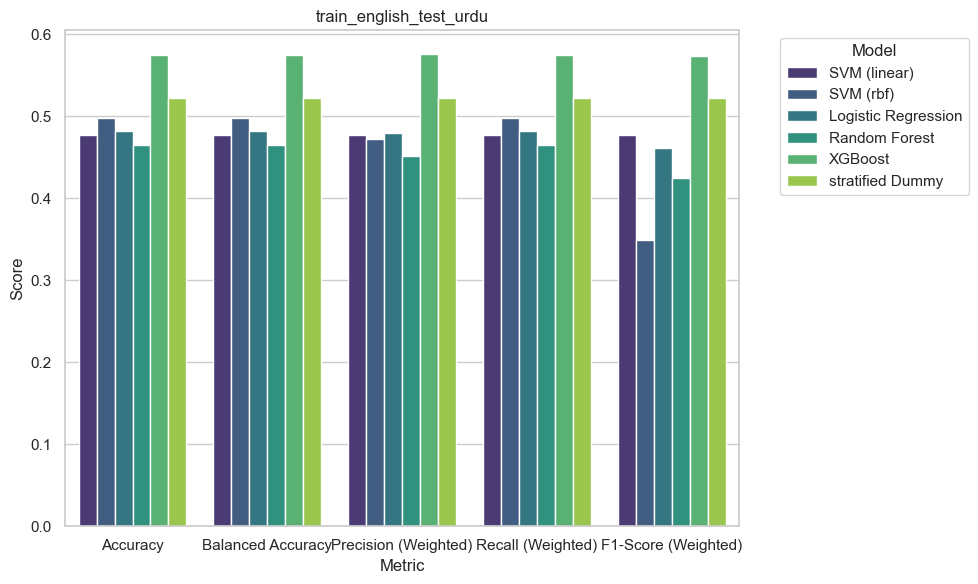

In [8]:
plot_results(train_english_test_urdu, "train_english_test_urdu")

For the models trained on the English dataset and tested on Urdu the performance is worse than the random dummy for every but the XGBoost model. For the latter, the performance is only slightly better than coincidence. Hence, we conclude that the English training data might not contain expressions of emotion that can be used to detect emotions in the Urdu testing data, indicating emotions are expressed differently in Urdu and English. However, the missing effect might be due to the small amount of speakers (4) cotained in the English database.

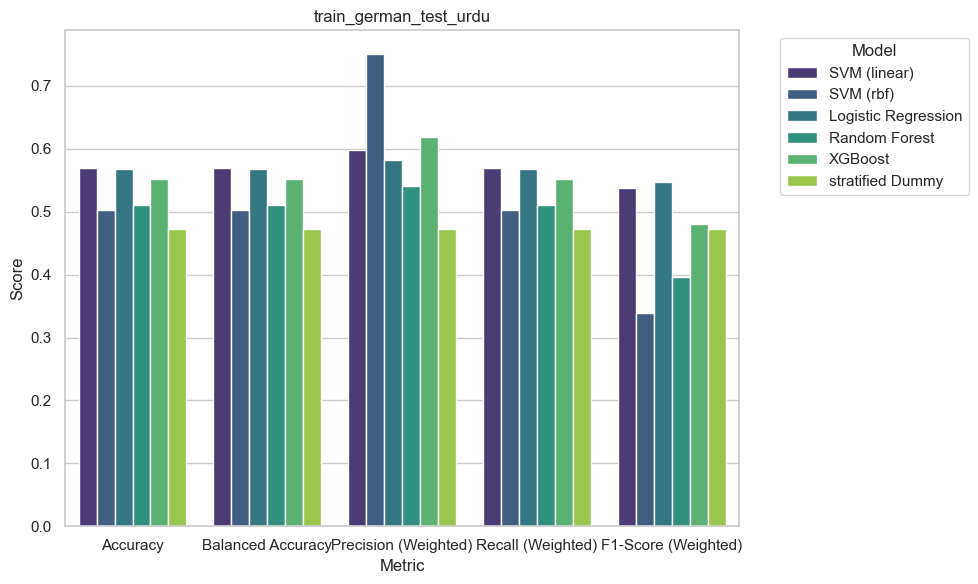

In [9]:
plot_results(train_german_test_urdu, "train_german_test_urdu")

For the models trained on the German dataset and tested on Urdu the performance is better than the random dummy for every model across all metrics except F1-Score. For the latter, the performance is worse than coincidence for the random forest and radial basis function support vector machine. However, performance is only slightly better than coincidence in most cases. Weighted Precision combined with the radial basis function support vector machine represents an exception with a highly deviating value that might be caused by random fluctuations. We conclude that there might be some features of emotional expression in the German dataset that can be used to detect emotions in Urdu, indicating that emotions may be expressed to some extend similar in German and Urdu.

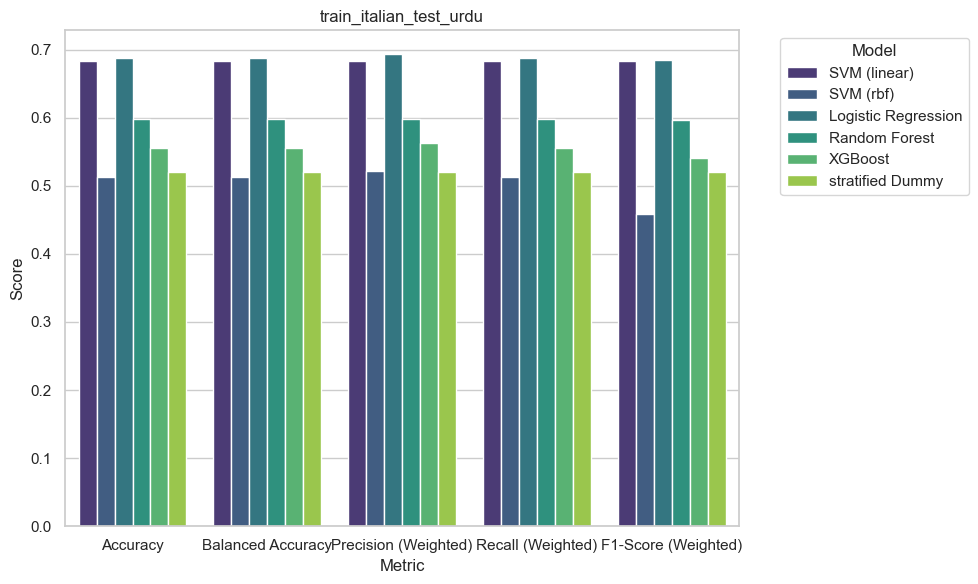

In [10]:
plot_results(train_italian_test_urdu, "train_italian_test_urdu")

For the models trained on the Italian dataset and tested on Urdu the performance is better than the random dummy for every model except radial basis function support vector machines. Although, performance is only slightly better than coincidence in some cases, logistic regression and linear support vector machines perform exceedingly well and far better than the random dummy. Hence, we conclude that there might be some features of emotional expression in the Italian dataset that can be used to detect emotions in Urdu, indicating that emotions may be expressed to some extend similar in Italian and Urdu.

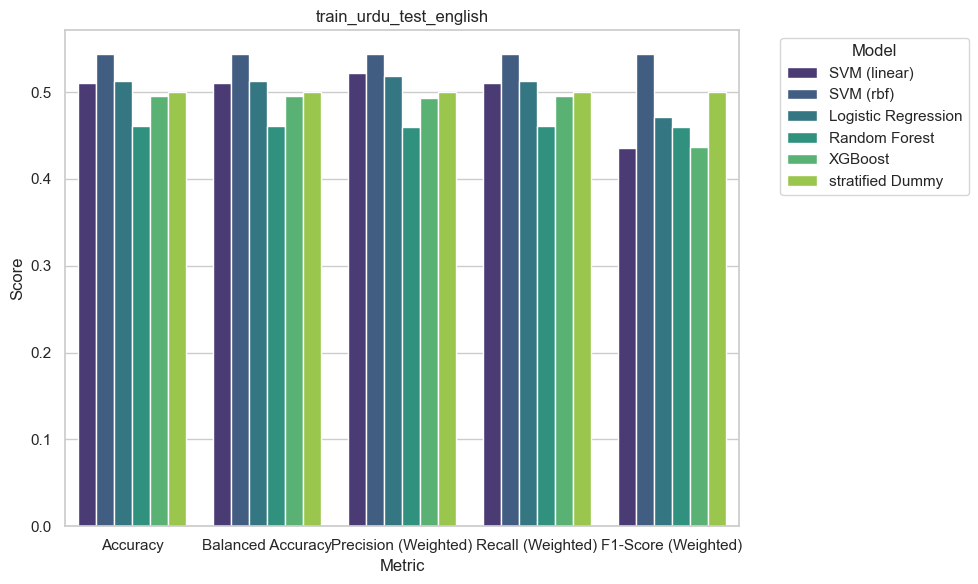

In [11]:
plot_results(train_urdu_test_english, "train_urdu_test_english")

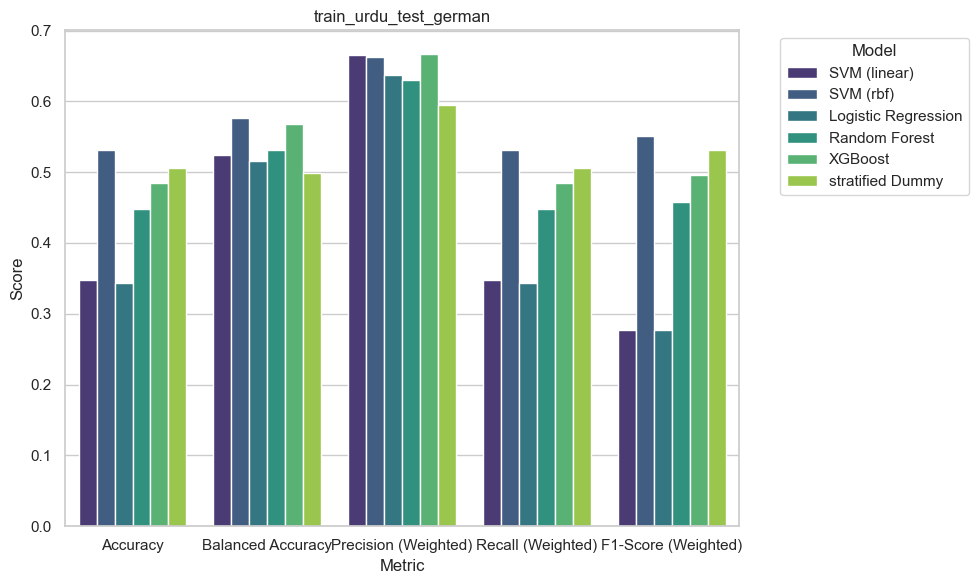

In [12]:
plot_results(train_urdu_test_german, "train_urdu_test_german")

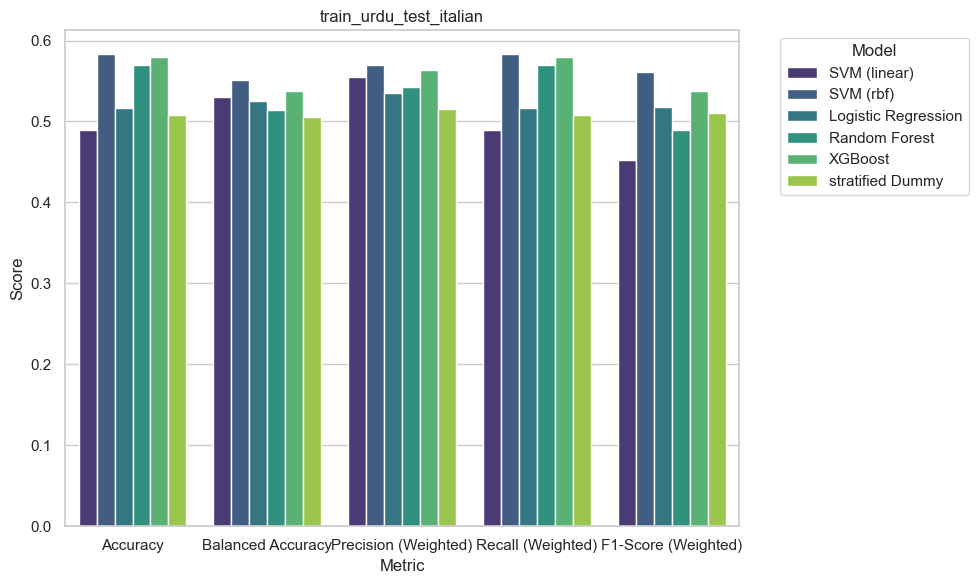

In [13]:
plot_results(train_urdu_test_italian, "train_urdu_test_italian")

For the models trained on the Urdu dataset and tested on the three other languages, the performance is highly fluctuative across all settings. For English and German it is hard to tell whether there are potential features of emotional expression in Urdu that can be used to detect emotions in English or German since the models and metrics results contradict one another. The only language with a slight tendency across multiple scores and metrics is Italian, indicating that the map between Italian and Urdu might go in both directions. Hence, we conclude that there might be some similar features in Urdu and Italian that are used to express emotions.

In [14]:
# create plots like in paper
# compare with baseline
# get baseline
df_baseline_accuracy = combined_df_baseline[(combined_df_baseline["Metric"] == "balanced_accuracy") & (combined_df_baseline["Model"] == "XGBoost")]


In [15]:
# training with urdu
datasets = ['German', 'English', 'Italian']
df_train_urdu_accuracy = combined_dfs_train_urdu[(combined_dfs_train_urdu["Metric"] == "Balanced Accuracy") & (combined_dfs_train_urdu["Model"] == "XGBoost")]

# testing with urdu
df_test_urdu_accuracy = combined_dfs_test_urdu[(combined_dfs_test_urdu["Metric"] == "Balanced Accuracy") & (combined_dfs_test_urdu["Model"] == "XGBoost")]


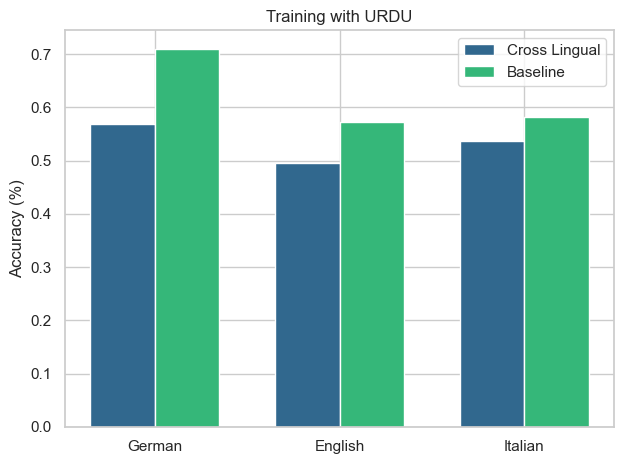

In [16]:
plot_crosslingual_vs_baseline(df_baseline_accuracy, df_train_urdu_accuracy, datasets, "Training with URDU")

When compared to baseline accuracies, XGBoost performs worse on all three "western" languages when trained on Urdu data than trained on the same language data. This makes sense, since a different result would indicate that there are more features in Urdu that predict the emotion in another language than there are in the language itself. The smallest gap between the baseline and urdu-trained XGBoost accuracy can be found for the Italian language. This corresponds to the results of the previous more detailed analysis with all models and metrics.

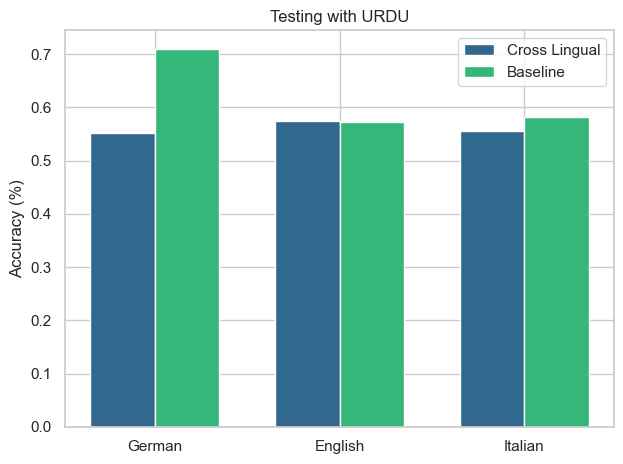

In [17]:
plot_crosslingual_vs_baseline(df_baseline_accuracy, df_test_urdu_accuracy, datasets, "Testing with URDU")

When tested on Urdu data, XGBoost performs worse when trained on German data than when tested and trained on German data. For Italian and English there is almost no difference in XGBoost performance when tested on Urdu compared to tested on the language it was trained on. Taking into account the more detailed analyses, it is likely that this is due to coincidence for English but might be not entirely random for Italian.

# Additional Comparison of Western Languages
Below, we try to find out more about linguistic distances and similarities between the languages. It would be expected that German and English have the highest accuracy since they are more closely related to one another than any other duo. However, English has the smallest overall dataset and produces the worst results across all analyses. Thus, it is questionable whether any results based on the English dataset are interpretable at all.

In [18]:
# read comparisons of western languages
train_english_test_german = pd.read_csv('train_english_test_german.csv')
train_english_test_italian = pd.read_csv('train_english_test_italian.csv')
train_german_test_english = pd.read_csv('train_german_test_english.csv')
train_german_test_italian = pd.read_csv('train_german_test_italian.csv')
train_italian_test_english = pd.read_csv('train_italian_test_english.csv')
train_italian_test_german = pd.read_csv('train_italian_test_german.csv')


In [19]:
# melt dfs
train_english_test_german = train_english_test_german.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_english_test_italian = train_english_test_italian.melt(id_vars="Model", var_name="Metric", value_name="Score")

train_german_test_english = train_german_test_english.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_german_test_italian = train_german_test_italian.melt(id_vars="Model", var_name="Metric", value_name="Score")

train_italian_test_english = train_italian_test_english.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_italian_test_german = train_italian_test_german.melt(id_vars="Model", var_name="Metric", value_name="Score")

In [20]:
df_train_english = [train_english_test_german, train_english_test_italian, train_english_test_urdu]
names = ['German', 'Italian', 'Urdu']
combined_dfs_train_english = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_train_urdu, names)],
        ignore_index=True
    )

df_train_german = [train_german_test_english, train_german_test_italian, train_german_test_urdu]
names = ['English', 'Italian', 'Urdu']
combined_dfs_train_german = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_train_urdu, names)],
        ignore_index=True
    )

df_train_italian = [train_italian_test_english, train_italian_test_german, train_italian_test_urdu]
names = ['English', 'German', 'Urdu']
combined_dfs_train_italian = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_train_urdu, names)],
        ignore_index=True
    )

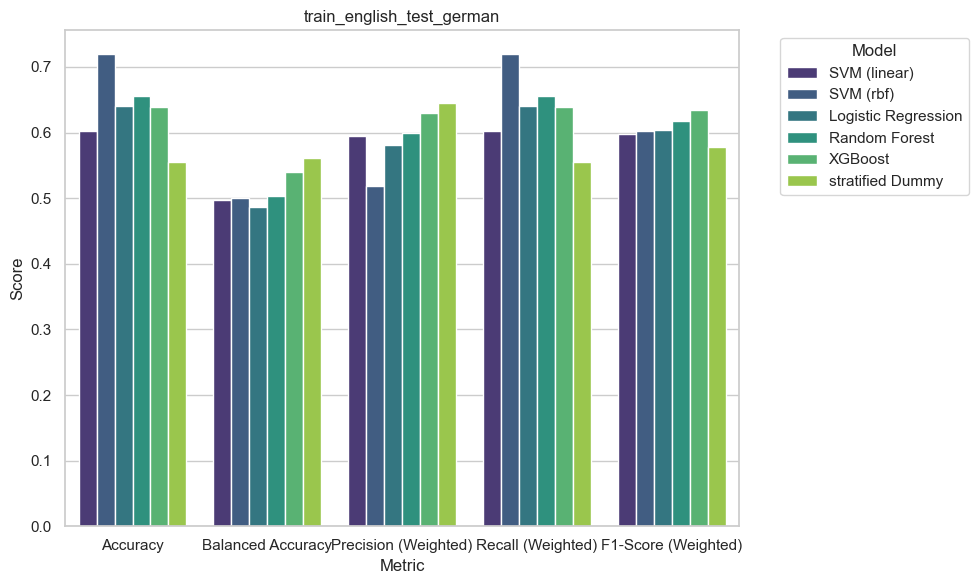

In [21]:
plot_results(train_english_test_german, "train_english_test_german")

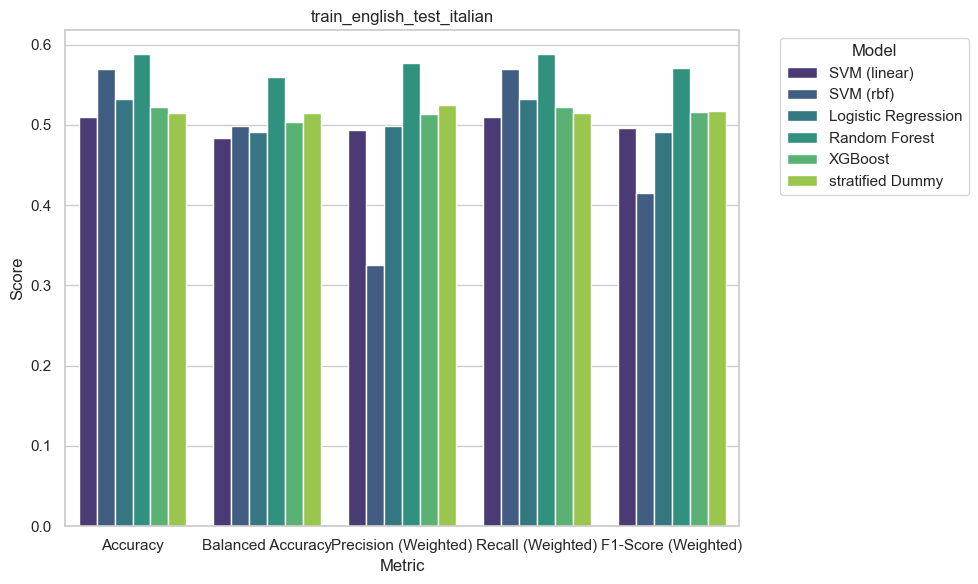

In [22]:
plot_results(train_english_test_italian, "train_english_test_italian")

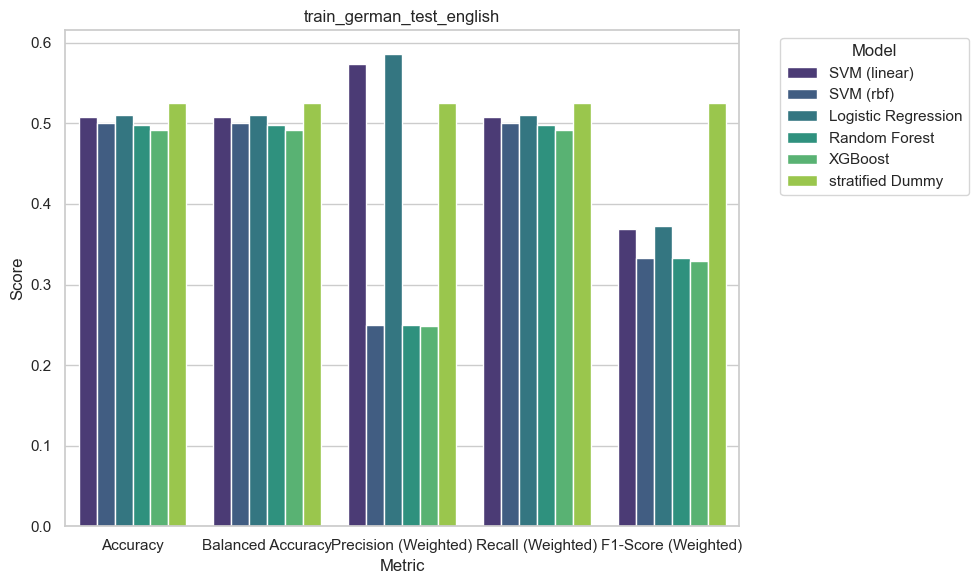

In [23]:
plot_results(train_german_test_english, "train_german_test_english")

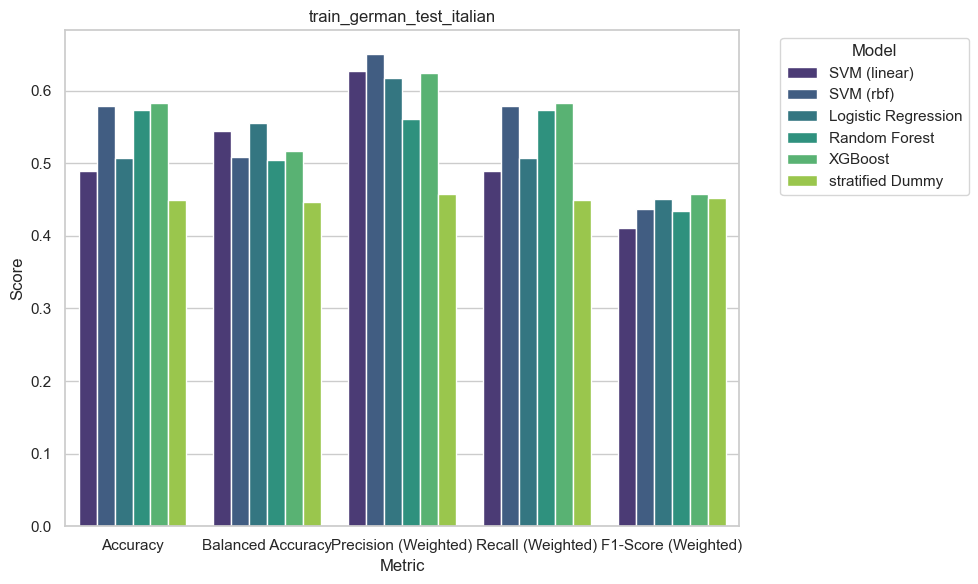

In [24]:
plot_results(train_german_test_italian, "train_german_test_italian")

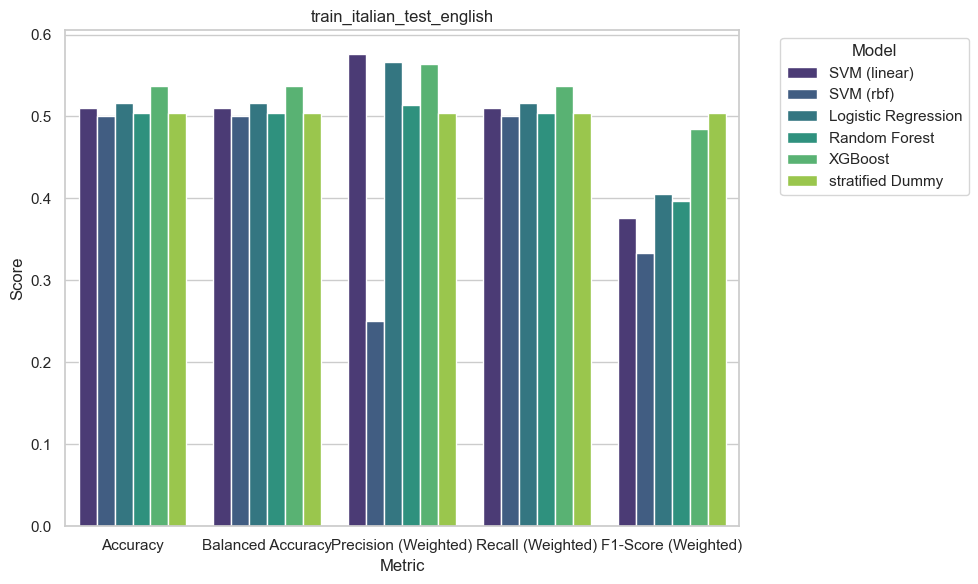

In [25]:
plot_results(train_italian_test_english, "train_italian_test_english")

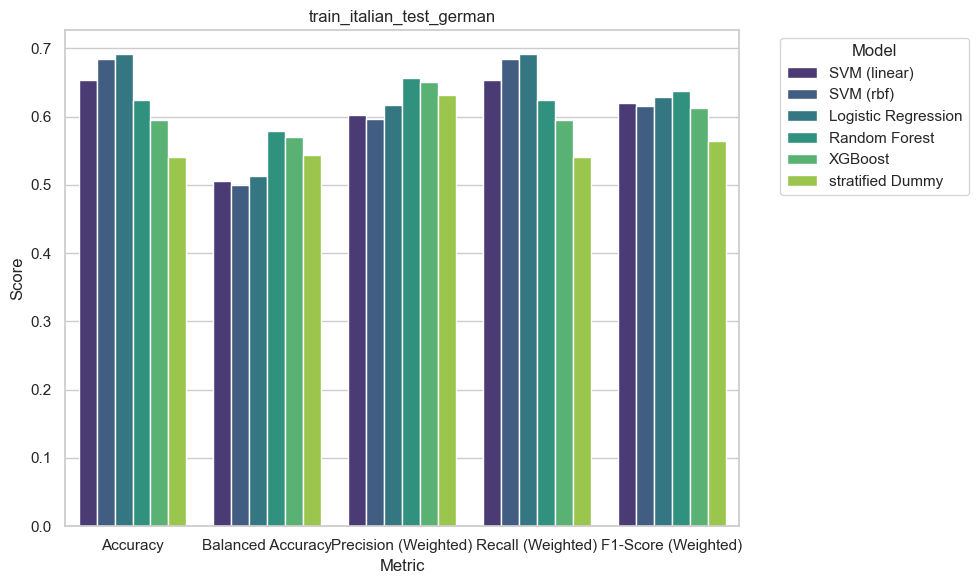

In [26]:
plot_results(train_italian_test_german, "train_italian_test_german")

When it comes to the comparison between "western" languages there is an unintuitive tendency that all analyses including English seem to score hardly above the random dummy. Although, German and Italian produce results better than coincidence in both directions across models and metrics. Based on this information it would be conclusive to say that German and Italian speakers express emotions more similar than English and German or English and Italian speakers, even though English and Italian don't perform worse than the dummy either but further analyses would have to be conducted to figure out in more detail whether they actually perform better. Accordingly, there seem to be some features in both German and Italian that can be used by a model to correctly detect emotions in the other language. 

As suspected, the English dataset is likely to cause enormous overfitting with only four male speakers compared to the other datasets with more speakers of both sexes. It is unlikely that English actually has so little similarity with German or Italian. 

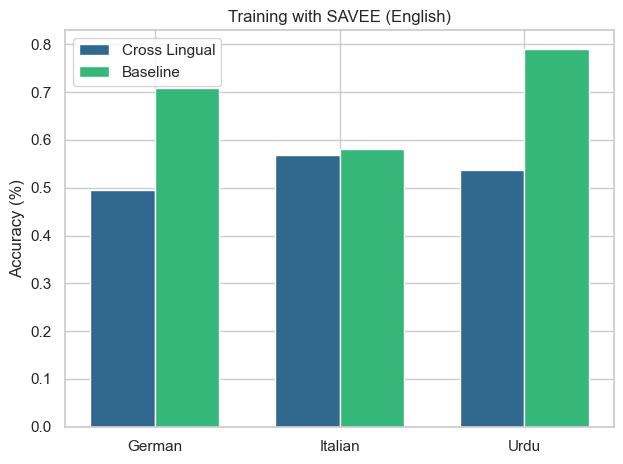

In [27]:
# Training with English 
datasets = ['German', 'Italian', 'Urdu']
df_train_english_accuracy = combined_dfs_train_english[(combined_dfs_train_english["Metric"] == "Balanced Accuracy") & (combined_dfs_train_english["Model"] == "XGBoost")]

plot_crosslingual_vs_baseline(df_baseline_accuracy, df_train_english_accuracy, datasets, "Training with SAVEE (English)")

The XGBoost model trained on English data produces results below baseline for all of the other languages. Thereby, Italian is the only one where the model comes close to baseline. These findings correspond to the more detailed analyses described above.

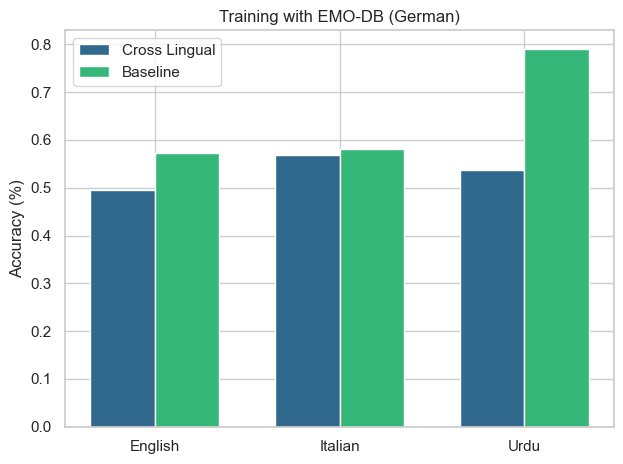

In [28]:
# Training with German 
datasets = ['English', 'Italian', 'Urdu']
df_train_german_accuracy = combined_dfs_train_german[(combined_dfs_train_german["Metric"] == "Balanced Accuracy") & (combined_dfs_train_german["Model"] == "XGBoost")]

plot_crosslingual_vs_baseline(df_baseline_accuracy, df_train_german_accuracy, datasets, "Training with EMO-DB (German)")

The XGBoost model trained on German data produces results below baseline for all of the other languages. Thereby, Italian is the only one where the model comes close to baseline. These findings correspond to the more detailed analyses described above. Compared to English, the German model performs almost identical for Italian and Urdu but comes slightly closer to the English baseline than vice versa. This is probably due to the lower baseline for English since both cross-lingual values do not differ from the random dummy.

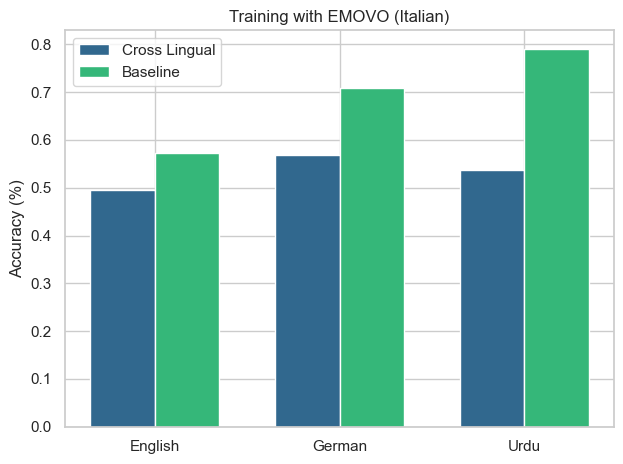

In [29]:
# Training with Italian 
datasets = ['English', 'German', 'Urdu']
df_train_italian_accuracy = combined_dfs_train_italian[(combined_dfs_train_italian["Metric"] == "Balanced Accuracy") & (combined_dfs_train_italian["Model"] == "XGBoost")]

plot_crosslingual_vs_baseline(df_baseline_accuracy, df_train_italian_accuracy, datasets, "Training with EMOVO (Italian)")

The XGBoost model trained on Italian data produces results below baseline for all of the other languages. The Italian trained model performs better than the others when tested on German data but similar to the others when tested on Urdu or English data. This is a bit surprising given the better than random performances for Italian across different settings but since baseline outperforms the dummy for all languages the effect of Italian features used for crosslingual emotion detection does not have to be questioned entirely. However, it is likely that the effect is rather small.

# Western Crosslingual Conclusion
We did not find any large differences in performance when comparing "western" languages to one another than when comparing them to Urdu. Hence, the conclusion that there are no significant linguistic relationships between the four languages (that are all from the indoeuropean language) or that they are all related similarly close to each other. Anyways, as stated before this conclusion cannot be drawn due to a lack of representative data, especially in the SAVEE dataset of the English language but also in terms of the other datasets. 